In [2]:

import numpy as np             
import math
import regions                                   
import pylab                                
import matplotlib                           
import matplotlib.gridspec as gridspec      
                                           
                                           
import scipy

import astropy.io.fits as fits             
                                           
from astropy.wcs import WCS                 
from astropy import units as u              

import pyspeckit as psk                     
                                            
                                           
from spectral_cube import SpectralCube     

from reproject import reproject_interp     
from reproject.mosaicking import find_optimal_celestial_wcs 


                                            
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

                                            
%matplotlib inline                             

matplotlib.rc('font', family='sans-serif')  
matplotlib.rc('text', usetex=True)      



# 13C160 

## Creates spectrum of file

In [10]:
path="A.Dust_Ridge_13C16O.cube.I.pbcor.fits"

#reads in the fits file and creaates a spectral cube
sc=SpectralCube.read(path)

sc.allow_huge_operations=True 

#changes frequency to GHz
sc_Ghz=sc.with_spectral_unit(u.GHz)

#changes jy/beam to Kelvin
sc_Ghz=sc_Ghz.to(u.K)

freq,Dec,Ra = sc_Ghz.world[:,0,0] 

#finds position and freq of the brightest source in the cube
z,x,y=pylab.where(sc_Ghz.hdu.data==np.nanmax(sc_Ghz.hdu.data))

#creates a 20x20 cubcube around the brightest source
subcube=sc_Ghz.hdu.data[:,int(x)-10:int(x)+10,int(y)-10:int(y)+10]


spectrum = np.average(subcube,axis=(1,2)) 


## Gaussian profile of spectrum

Param #0   AMPLITUDE0 =      12.0742 +/-        0.021506 
Param #1       SHIFT0 =      110.187 +/-     1.47662e-06 
Param #2       WIDTH0 =  0.000717954 +/-     1.47662e-06   Range:   [0,inf)


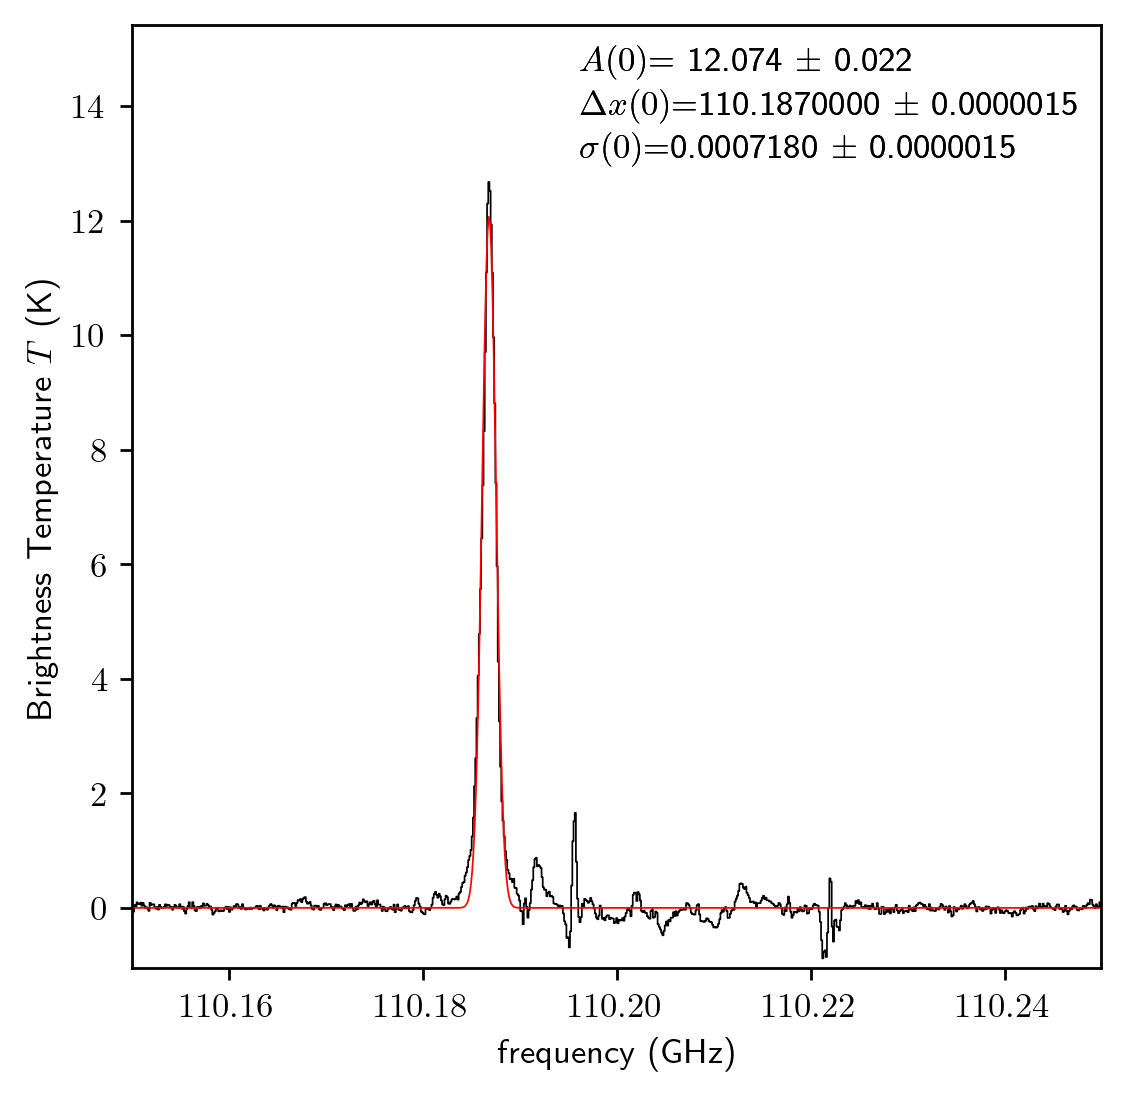

In [11]:
#zooms in on major intensity spike (assumed to be 12CO)
zoom = np.where((freq.value>110.15)*(freq.value<110.25))

#zooms in on the spectrum we found in the last code block
zoom_13C160=spectrum[zoom]

#zooms in on the frequency's in this zoomed in region
zoom_freq = freq[zoom]


error = np.zeros(np.size(zoom))
wheremeas = np.where((zoom_freq.value>110.16)*(zoom_freq.value<110.18))
meas = np.std(zoom_13C160[wheremeas])  
error = error + meas

sp = psk.Spectrum(data=zoom_13C160,xarr=zoom_freq,error=error,unit='K')
fig1 = pylab.figure(1,figsize=(5,5),dpi=250)
sp.plotter(axis=pylab.subplot(1,1,1))
sp.specfit(fittype='gaussian')
sp.plotter.savefig('13C160gaussianplot.png')
print(sp.specfit.parinfo)

# 12C180

## Creates spectrum of file

In [13]:
path="A.Dust_Ridge_12C18O.cube.I.pbcor.fits"

#reads in the fits file and creaates a spectral cube
sc=SpectralCube.read(path)

sc.allow_huge_operations=True 

#changes frequency to GHz
sc_Ghz=sc.with_spectral_unit(u.GHz)

#changes jy/beam to Kelvin
sc_Ghz=sc_Ghz.to(u.K)

freq,Dec,Ra = sc_Ghz.world[:,0,0] 

#finds position and freq of the brightest source in the cube
z,x,y=pylab.where(sc_Ghz.hdu.data==np.nanmax(sc_Ghz.hdu.data))

#creates a 20x20 cubcube around the brightest source
subcube=sc_Ghz.hdu.data[:,int(x)-10:int(x)+10,int(y)-10:int(y)+10]


spectrum = np.average(subcube,axis=(1,2)) 


## Gaussian profile of spectrum

Param #0   AMPLITUDE0 =      5.53416 +/-       0.0242508 
Param #1       SHIFT0 =       109.89 +/-     2.83318e-06 
Param #2       WIDTH0 =  0.000559924 +/-     2.83318e-06   Range:   [0,inf)


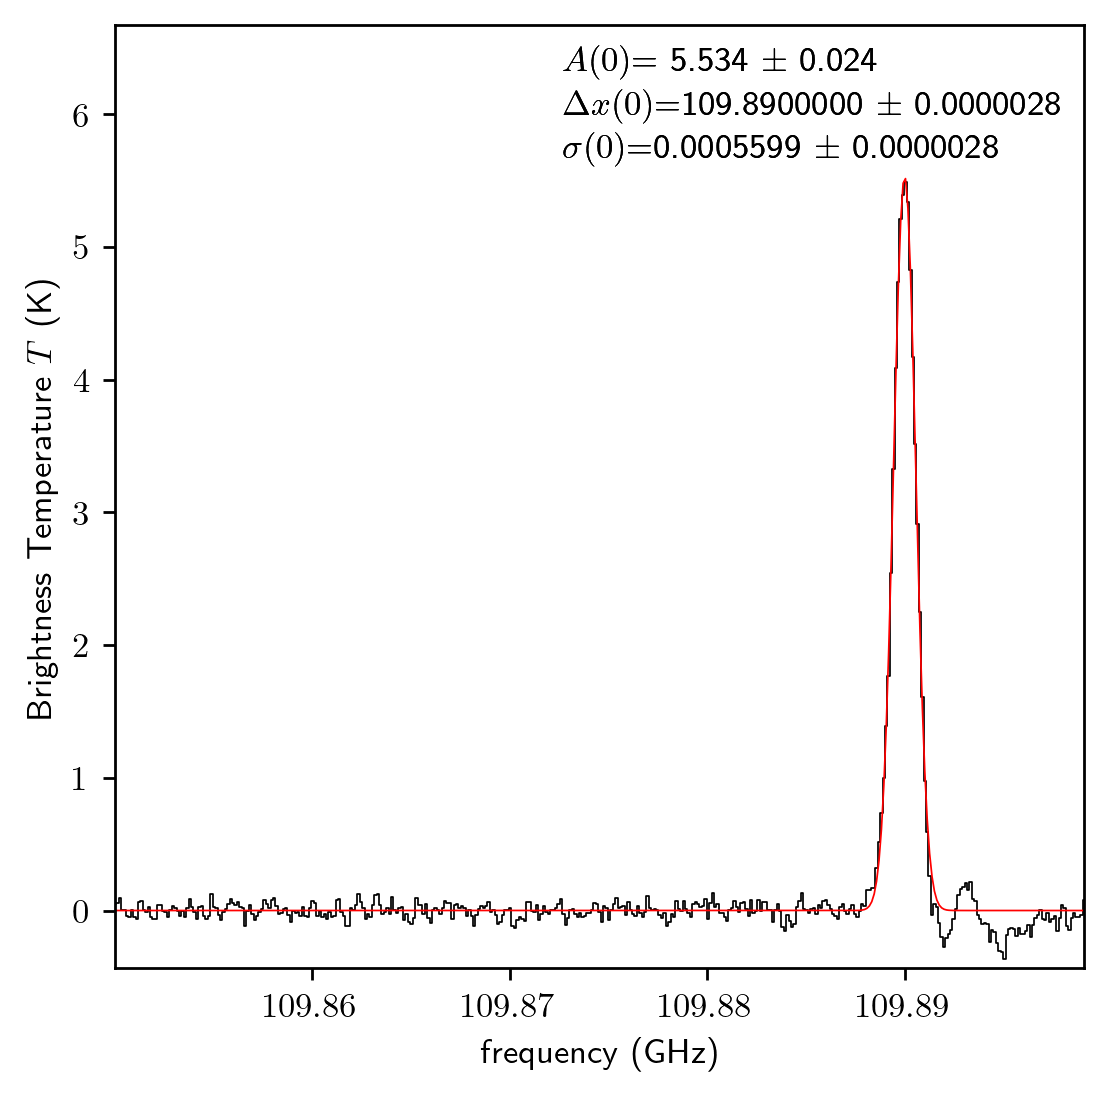

In [14]:
#zooms in on major intensity spike (assumed to be 12CO)
zoom = np.where((freq.value>109.85)*(freq.value<109.90))

#zooms in on the spectrum we found in the last code block
zoom_12C180=spectrum[zoom]

#zooms in on the frequency's in this zoomed in region
zoom_freq = freq[zoom]


error = np.zeros(np.size(zoom))
wheremeas = np.where((zoom_freq.value>109.86)*(zoom_freq.value<109.87))
meas = np.std(zoom_12C180[wheremeas])  
error = error + meas

sp = psk.Spectrum(data=zoom_12C180,xarr=zoom_freq,error=error,unit='K')
fig1 = pylab.figure(1,figsize=(5,5),dpi=250)
sp.plotter(axis=pylab.subplot(1,1,1))
sp.specfit(fittype='gaussian')
sp.plotter.savefig('12C180gaussianprofileplot.png')
print(sp.specfit.parinfo)